In [7]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-12 14:51:06,788: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
# A Method to quickly generate and test various oracles
def generate_oracle(qc, n, bitstring):
    bitstring = bitstring[::-1] # Reversing the bitstring due to Qiskit's reverse numbering
    
    for i in range(n):
        if bitstring[i] == '0':
            qc.i(i)
        else:
            qc.cx(i,n)

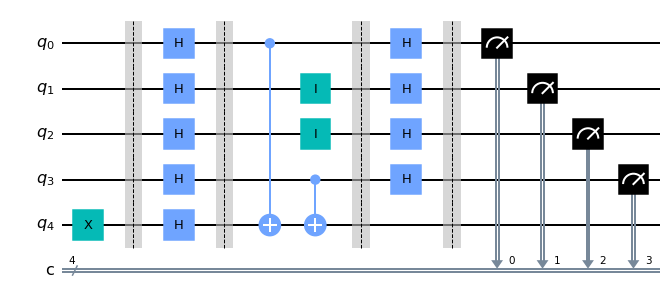

In [5]:
# This implementation of the Bernstein Vazirani Algorithm will use an n-bit function f(x).
n = 4

# The first n qubits represent the first quantum register, and the last qubit is our target qubit
q_Circuit = QuantumCircuit((n + 1), n)


# Initializing the nth qubit to |1>:
q_Circuit.x(n)

q_Circuit.barrier()

# Applying Hadamard to each qubit:
for i in range(n + 1):
    q_Circuit.h(i)

q_Circuit.barrier()

# Using generate_oracle:
generate_oracle(q_Circuit, n, '1001')

q_Circuit.barrier()

# Applying Hadamard on the first n qubits:
for i in range(n):
    q_Circuit.h(i)

q_Circuit.barrier()

# Finally, measuring the first n qubits:
for i in range(n):
    q_Circuit.measure(i,i)
    
q_Circuit.draw()

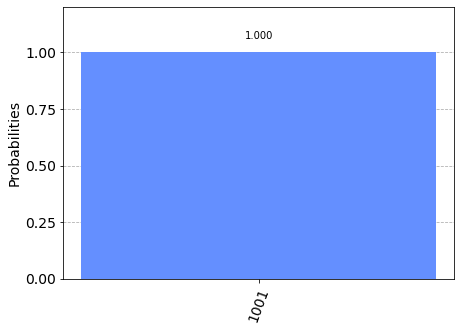

In [8]:
# Running on a simulator:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(q_Circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()a

plot_histogram(answer)

In [9]:
# Running on actual Quantum Hardware:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_q_Circuit = transpile(q_Circuit, backend, optimization_level=3)
job = backend.run(transpiled_q_Circuit)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2022-07-12 14:51:23,921: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito
Job Status: job has successfully run


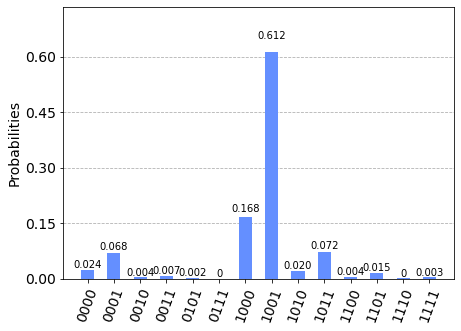

In [10]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)